In [1]:
import torch
import numpy as np

In [2]:
from sklearn.neighbors import NearestNeighbors
from src.intrinsic.functional.information import hellinger
from scipy.spatial.distance import cdist

In [14]:
f = torch.load(f'attention/54_attention_0.pt').numpy(force=True).astype('float32')[0]
g = torch.load(f'attention/54_attention_1.pt').numpy(force=True).astype('float32')[0]
nn = NearestNeighbors(n_neighbors=5, metric='precomputed').fit(cdist(f, f, metric=hellinger))
nn2 = NearestNeighbors(n_neighbors=5, metric='precomputed').fit(cdist(g, g, metric=hellinger))
_, ix = nn.kneighbors()
_, ix2 = nn2.kneighbors()

In [18]:
np.multiply.reduce([np.eye(f.shape[-1])[ix].sum(axis=-2), np.eye(g.shape[-1])[ix2].sum(axis=-2)])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

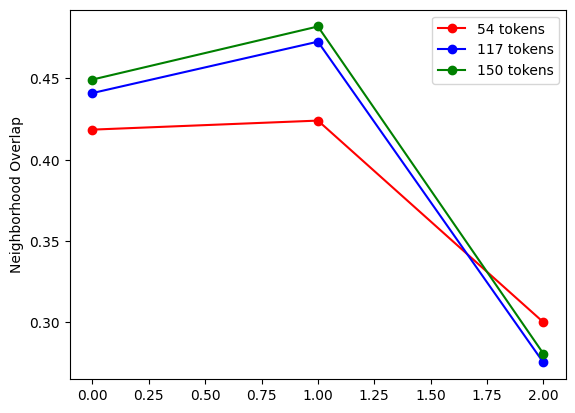

In [7]:
n = 54, 117, 150

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_ylabel('Neighborhood Overlap')
c = ['r', 'b', 'g']
col = iter(c)

for ni in n:
    A = []
    for k in range(4):
        f = torch.load(f'attention/{ni}_attention_{k}.pt').numpy(force=True).astype('float32')[0]
        nn = NearestNeighbors(n_neighbors=10, metric='precomputed').fit(cdist(f, f, metric=hellinger))
        _, ix = nn.kneighbors()
        A.append(np.eye(f.shape[-1])[ix].sum(axis=-2))
    A = np.array(A)
    ax.plot((A[1:] * A[:-1]).sum(axis=-1).sum(axis=-1) / 10 / A[0].shape[0], 'o-', c=next(col), label=f'{ni} tokens')
plt.legend()
# plt.savefig('overlap.png')

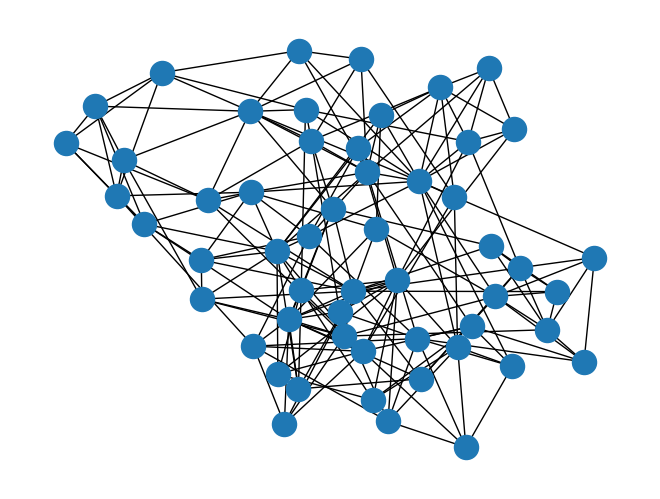

In [85]:
import networkx as nx

ni = 54
k = 3
f = torch.load(f'attention/{ni}_attention_{k}.pt').numpy(force=True).astype('float32')[0]
nn = NearestNeighbors(n_neighbors=5, metric='precomputed').fit(cdist(f, f, metric=hellinger))
_, ix = nn.kneighbors()
d0 = np.eye(f.shape[-1])[ix].sum(axis=-2)
G = nx.Graph()
e = []
for i in range(d0.shape[0]):
    for j in range(d0.shape[0]):
        if d0[i][j] == 1:
            e.append((i, j))
G.add_edges_from(e)
nx.draw(G)

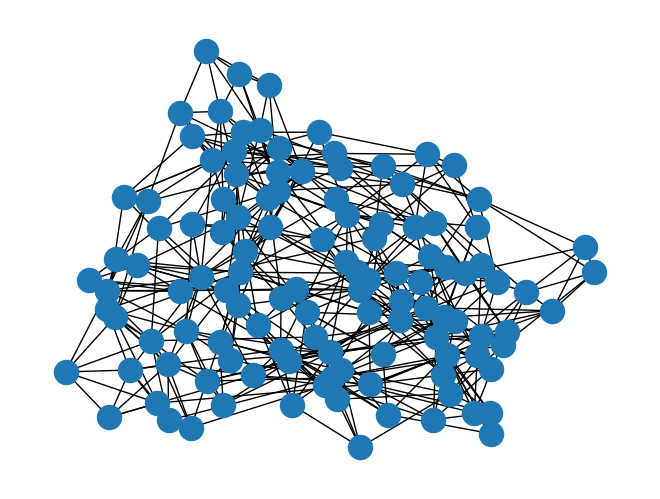

In [89]:
import networkx as nx

ni = 117
k = 3
f = torch.load(f'attention/{ni}_attention_{k}.pt').numpy(force=True).astype('float32')[0]
nn = NearestNeighbors(n_neighbors=5, metric='precomputed').fit(cdist(f, f, metric=hellinger))
_, ix = nn.kneighbors()
d0 = np.eye(f.shape[-1])[ix].sum(axis=-2)
G = nx.Graph()
e = []
for i in range(d0.shape[0]):
    for j in range(d0.shape[0]):
        if d0[i][j] == 1:
            e.append((i, j))
G.add_edges_from(e)
nx.draw(G)

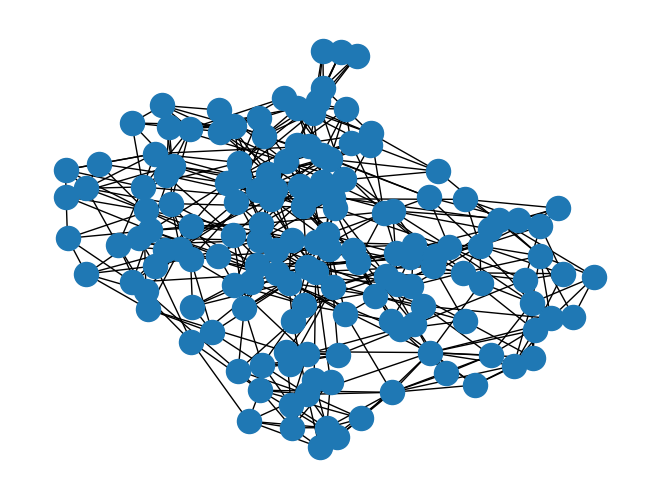

In [93]:
import networkx as nx

ni = 150
k = 3
f = torch.load(f'attention/{ni}_attention_{k}.pt').numpy(force=True).astype('float32')[0]
nn = NearestNeighbors(n_neighbors=5, metric='precomputed').fit(cdist(f, f, metric=hellinger))
_, ix = nn.kneighbors()
d0 = np.eye(f.shape[-1])[ix].sum(axis=-2)
G = nx.Graph()
e = []
for i in range(d0.shape[0]):
    for j in range(d0.shape[0]):
        if d0[i][j] == 1:
            e.append((i, j))
G.add_edges_from(e)
nx.draw(G)
import matplotlib.pyplot as plt
plt.savefig(f'150_neighborhoods_{k}.png')

In [38]:
texts = [
    'A simple example of a statistical manifold, taken from physics, would be the canonical ensemble: it is a one-dimensional manifold, with the temperature T serving as the coordinate on the manifold',
    'For any fixed temperature T, one has a probability space: so, for a gas of atoms, it would be the probability distribution of the velocities of the atoms',
    'As one varies the temperature T, the probability distribution varies'
]

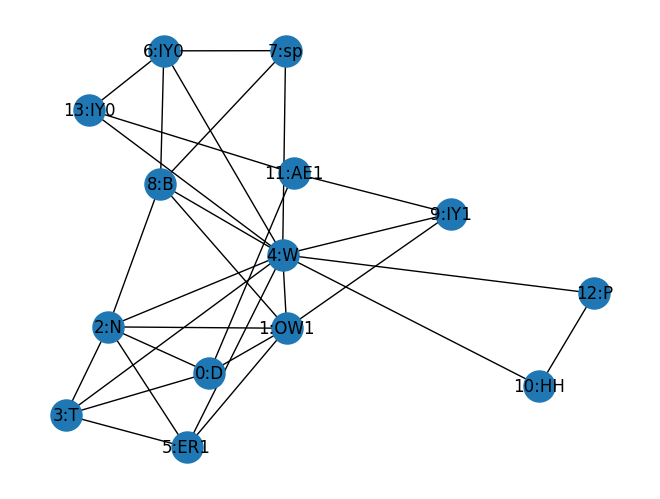

In [126]:
import networkx as nx

ni = 15
k = 3
f = torch.load(f'attention/{ni}_attention_{k}.pt').numpy(force=True).astype('float32')[0]
nn = NearestNeighbors(n_neighbors=3, metric='precomputed').fit(cdist(f, f, metric=hellinger))
_, ix = nn.kneighbors()
d0 = np.eye(f.shape[-1])[ix].sum(axis=-2)[:-1, :-1]
G = nx.Graph()
e = []
text = 'D OW1 N T W ER1 IY0 sp B IY1 HH AE1 P IY0'.split()
nodes = [f'{i}:{text[i]}' for i in range(d0.shape[0])]
for i in range(d0.shape[0]):
    for j in range(d0.shape[0]):
        if d0[i][j] == 1:
            e.append((f'{i}:{text[i]}', f'{j}:{text[j]}'))
G.add_edges_from(e)
nx.draw(G, with_labels = True, node_size=500)
# import matplotlib.pyplot as plt
# plt.savefig(f'15_neighborhoods_{k}.png')

In [78]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (1, 8), (2, 4), (3, 4), (3, 5), (4, 5), (4, 8), (8, 6), (8, 7), (6, 13), (13, 11), (9, 11), (10, 12), (10, 14), (12, 14)])

In [110]:
text = 'D OW1 N T W ER1 IY0 sp B IY1 HH AE1 P IY0'.split()
len(text)

14